In [1]:
!pip install neurolab

     |████████████████████████████████| 655kB 526kB/s eta 0:00:01
  Stored in directory: /Users/jonatasilva/Library/Caches/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import neurolab as nl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# StringIO behaves like a file object 
from io import StringIO 

import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# Criando datasets de treino
x = np.linspace(-10,10, 60)
y = np.cos(x) * 0.9
size = len(x)
x_train = x.reshape(size,1)
y_train = y.reshape(size,1)

In [4]:
c = ''
with open("instance_test.txt", "r") as fd:
    c = StringIO(fd.read())

In [5]:
d = c.read()
c = StringIO(d) 
d = np.loadtxt(c) 
feature_names = ['a', 'b', 'low', 'up', 'd', 'r', 'lamb_initial', 'target']

knapsack = {"data":d, "feature_names": feature_names}
dataset = pd.DataFrame(knapsack['data'], columns = knapsack['feature_names'])



ValueError: Shape of passed values is (79645, 18), indices imply (79645, 8)

In [116]:
size = 500

x_train = dataset.iloc[:,:-1]
x_train = x_train.values

x = dataset['lamb_initial'].values
y = dataset['target'].values

x_train = x.reshape(size,1)
y_train = y.reshape(size,1)

In [117]:
x

array([7.387146, 6.446908, 6.442768, 7.105935, 7.864088, 7.526051,
       7.446503, 7.021477, 6.556314, 6.354028, 6.462048, 6.631865,
       7.2733  , 7.487878, 7.038277, 6.954369, 7.545249, 6.439624,
       7.136722, 7.222885, 7.202725, 7.053731, 6.841061, 7.104021,
       6.781141, 7.144833, 6.81867 , 6.683864, 6.91271 , 6.733153,
       7.527549, 6.952919, 7.150525, 7.475066, 6.810334, 7.15066 ,
       6.949323, 7.23471 , 6.314744, 6.337766, 6.969872, 7.389188,
       7.040751, 6.959647, 7.456355, 6.895865, 6.97928 , 7.220283,
       7.116862, 7.173503, 7.303475, 6.276869, 6.420582, 6.488612,
       6.811593, 7.444763, 7.780504, 7.026531, 6.886618, 7.813326,
       8.032857, 7.27258 , 6.933053, 6.5509  , 7.258989, 6.581697,
       6.728931, 7.427017, 7.688842, 7.504999, 6.941596, 6.258853,
       6.71114 , 7.299328, 6.499169, 6.947533, 6.515124, 7.501226,
       8.465196, 7.391237, 6.975976, 6.785137, 6.878839, 7.907744,
       7.271908, 6.738923, 7.928721, 7.233907, 7.053144, 7.214

Epoch: 100; Error: 15585.428228514167;
Epoch: 200; Error: 15585.428228514167;
Epoch: 300; Error: 15585.428228514167;
Epoch: 400; Error: 15585.428228514167;
Epoch: 500; Error: 15585.428228514167;
Epoch: 600; Error: 15585.428228514167;
Epoch: 700; Error: 15585.428228514167;
Epoch: 800; Error: 15585.428228514167;
Epoch: 900; Error: 15585.428228514167;
Epoch: 1000; Error: 15585.428228514167;
The maximum number of train epochs is reached


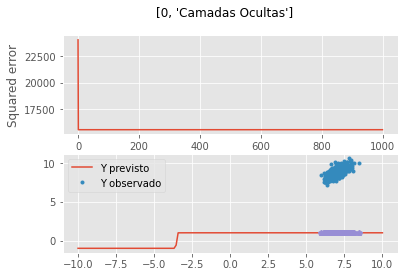

IndexError: list index out of range

In [119]:
# Criando 4 redes com 0, 1, 2, e 3 camadas e randomizando a inicialização
# d = [[1,1000],[45,1],[45,45,1],[45,45,45,1]]

d = [[45,1]]

for i in range(4):
    net = nl.net.newff([[-10, 10]],d[i])
    train_net = nl.train.train_gd(net, x_train, y_train, epochs = 1000, show = 100)
    outp = net.sim(x_train)
    
    # Plot 
    plt.subplot(2, 1, 1)
    plt.plot(train_net)
    plt.xlabel('Epochs')
    plt.ylabel('Squared error')
    x2 = np.linspace(-10.0,10.0,150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
    y3 = outp.reshape(size)
    plt.subplot(2, 1, 2)

    plt.suptitle([i ,'Camadas Ocultas'])
    plt.plot(x2, y2, '-',x , y, '.', x, y3, 'p')
    plt.legend(['Y previsto', 'Y observado'])
    plt.show()